#IRIS를 이용한 전처리 Homework
0.라이브러리불러오기

1.0. 데이터셋 불러오기

1.1. sklearn 내장 데이터 불러오거나

1.2. 구글드라이브에 저장한 외부 데이터 다운로드

2.0. 데이터셋 오염시키기(제공된 코드 사용)

// 분석용 데이터 준비

3.0. 데이터셋 정상화시키기

3.1. 결측치

3.1.1. 결측치확인하기

3.1.2. 결측치 정상화 방법 선정하기(이 경우에는 가능한 많은 케이스 사용)

3.2. 이상치

3.2.1. 이상치 확인하기

3.2.2. 결측치 정상화 방법 선정하기(상동)

4. 결과 확인하기

# 0. 기본 라이브러리 불러오기

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



## 1.1. sklearn에서 내장 데이터셋 로드하기


In [ ]:
from sklearn.datasets import load_iris

iris= load_iris()

X = iris.data
y = iris.target

print("Features : ", X.shape)
print("Target : ", y.shape)


Features :  (150, 4)
Target :  (150,)


In [ ]:
# 데이터셋에 대한 정보를 담고 있음(description)
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [ ]:
print(iris.target_names)
print(iris.feature_names)

['setosa' 'versicolor' 'virginica']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [ ]:
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [ ]:
## feature name을 숫자에서 이름으로 변환
feature_names = [name.split()[0]+'_'+name.split()[1] for name in iris.feature_names]
## 변환된 feature name을 column 값으로 가지는 데이터 프레임 생성
iris_df = pd.DataFrame(data=iris.data, columns=feature_names)

## 타겟값으로 새로운 칼럼 만들기
iris_df['Label'] = iris.target
#iris_df['boom'] = 1 # 테스트용 열
#iris_df.drop(columns=['boom']) # 일시적으로 지운 결과
#iris_df = iris_df.drop(columns=['boom']) # 지운 결과를 원본에 덮어씀
#iris_df.drop('boom',axis=1, inplace=True)# 또는 이렇게 덮어씀
## 딕셔너리 이용해서 Label 칼럼의 타겟값을 타겟네임으로 매칭 및 바꿈
iris_df['Label'] = iris_df['Label'].map(dict(enumerate(iris.target_names)))
iris_df

,sepal_length,sepal_width,petal_length,petal_width,Label
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [ ]:
## 만들어진 데이터프레임을 CSV 파일로 저장
file_path = 'iris_dataset.csv'
iris_df.to_csv(file_path, index=False)

In [ ]:
## 또는 구글드라이브에 csv 파일로 저장(위의 파일만 저장하는 것은 세션이 끝나면 휘발되기 때문에)
from google.colab import drive
drive.mount('/content/gdrive')

!pwd # 현재 위치
!ls /content # 해당 디렉토리의 내용 확인
!ls /content/gdrive
!ls /content/gdrive/MyDrive
!ls /content/gdrive/MyDrive/SeSAC/

file_path = '/content/gdrive/MyDrive/SeSAC/iris_dataset.csv' # 마지막에 파일명으로 끝나도록 주의
iris_df.to_csv(file_path, index=False)

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content
drive  gdrive  iris_dataset.csv  sample_data
MyDrive
 2013136136_최형회_윈도우즈_Assignment2.zip
 Calibrator_교정성적서_사본.png
'Colab Notebooks'
 CoretexM4.zip
 DUPC.egg
'Interaction Lab..gsite'
'Personal Curriculum Vitae.gsite'
 SeSAC
 가계부
'성인학습론(미국,성인교육, 역사적 배경) (1).txt.gdoc'
'성인학습론(미국,성인교육, 역사적 배경).txt.gdoc'
'순번08_가상현실을 위한 멀티모달 햅틱 컨트롤러_발표자료.pptx'
'스킬 측정기 백업.gsheet'
'제목없는 스프레드시트.gsheet'
 코코피시방.gsheet
 1_인공지능이론.pdf		    'LMS 참고자료.txt'
 1_주요라이브러리.ipynb		     No01_iris_data_2506181452.ipynb
 250617000_호서대조학수교수님.docx   No01_iris_data.ipynb
 2_matplotlib_stu.ipynb		     part4_1.회귀.ipynb
 2_데이터분석및전처리.pdf	     part4_2.분류.ipynb
 2_전처리.ipynb			     part4_3.군집.ipynb

##드라이브에서 기본 데이터셋 다운로드하기

In [ ]:
## 여러 번 불러오지 않기 위해 주석처리
#from google.colab import drive
#drive.mount('/content/gdrive')

file_path = '/content/gdrive/MyDrive/SeSAC/iris_dataset.csv'
iris_df = pd.read_csv(file_path) # to_csv는 데이터프레임에, read_csv는 판다스에 있음
iris_df

,sepal_length,sepal_width,petal_length,petal_width,Label
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


##2.0 데이터셋 오염시키기

In [ ]:
# 교수님 제공 예제
df = iris_df
df.loc[(df['sepal_width']> 3.0) &(df['sepal_width'] < 3.2), 'sepal_width'] =np.nan # 결측치 생성
df.loc[(df['petal_length']> 6.0), 'petal_width'] = 30 # 이상치 생성
df

,sepal_length,sepal_width,petal_length,petal_width,Label
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,NaN,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


###결측치 확인하기

In [ ]:
# 결측치 확인가능 # 누락되거나 비어있는 값(missing data)
df.isnull().sum()

,0
sepal_length,0
sepal_width,11
petal_length,0
petal_width,0
Label,0


#3.1.2 결측치 정상화 방법 선정하기



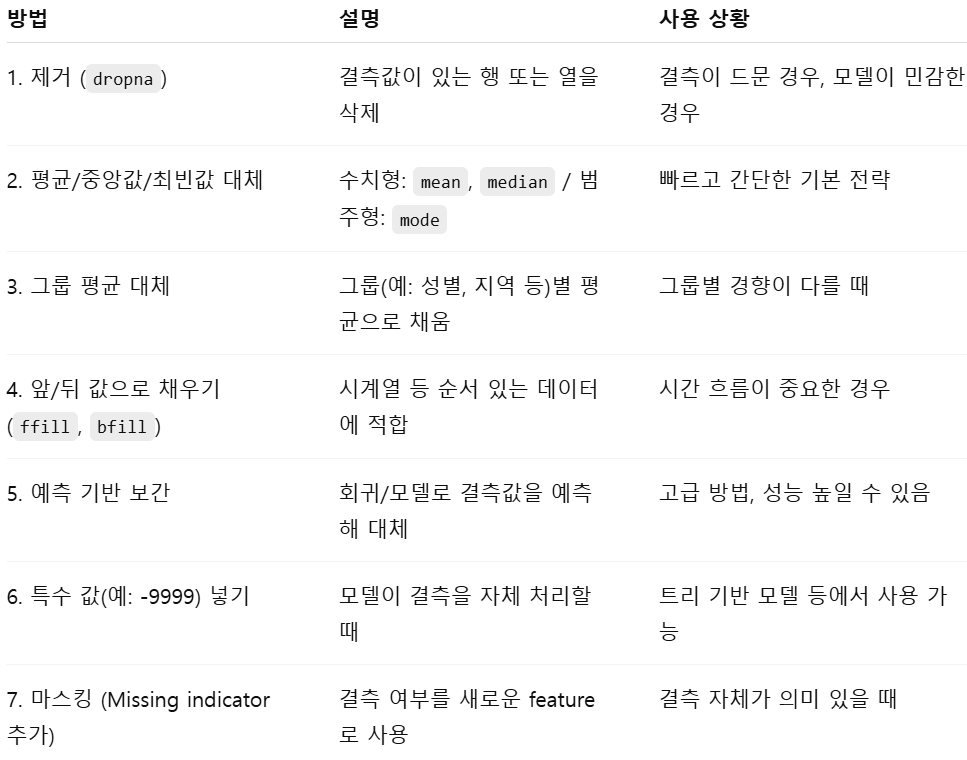

In [ ]:
from IPython.display import Image
Image('/content/gdrive/MyDrive/SeSAC/Ref/NanValueto.png')

In [ ]:
print(df.isnull().sum()) # isnull()과 isna()는 같은 함수임
##1)결측치가 포함된 Feature 전부 제거
##dropna() 함수 사용, NaN이 하나라도 포함된 행 전체 삭제됨
df_1 = df
df_1 = df_1.dropna()
## 참고 : 열 단위 결측값 제거 : dropna(axis=1)
#2.1) 평균값으로 대체하기
# mean() 함수 사용, 속성 skipna 이 default true 이기 때문에 nan 빼고 계산됨
df_2 = df
df_2['sepal_width'].mean()
## 또는 df['sepal_width'].drop().mean()
## 참고 valid_width = df['sepal_width'][df['sepal_width'].notna()]
## ㄴ valid_width.mean()
#df['sepal_width'].fillna(df['sepal_width'].mean(), inplace=True) # inplace 속성이 True 이면 원본에 바로 적용됨 # inplace 속성을 활용하면 체인할당이 발생해 명확한 동작을 보장받기 어려우니 명확한 할당을 이용하거나 딕셔너리 방식을 통해 코드 작성할 것
#2.2) 중앙값으로 대체하기
## median() 함수 사용, nan을 자동으로 무시하고 중앙값을 계산함
df_3 = df
temp = df_3['sepal_width'].median()
df_3['sepal_width'] = df_3['sepal_width'].fillna(temp)
#2.3) 최빈값으로 대체하기
# mode 함수는 최빈값을 Series 형태로 반환
df_4 = df
temp = df_4['sepal_width'].mode()[0]
df_4['sepal_width'].fillna(temp, inplace=True)
## 참고 : 모든 열의 결측값을 각 열의 최빈값으로 대체하기
#for col in df.columns:
#  mode_val = df[col].mode()[0]
#  df[col] = df[col].fillna(mode_val)
#3) 그룹별 평균으로 NaN 대체
df_5 = df
df_5['sepal_width'] = df_5.groupby('sepal_length')['sepal_width'].transform(lambda x: x.fillna(x.mean()))
print(df.isna().sum())
print(df_1.isnull().sum())
print(df_2.isnull().sum())
print(df_3.isnull().sum())
print(df_4.isnull().sum())
print(df_5.isnull().sum())

sepal_length     0
sepal_width     11
petal_length     0
petal_width      0
Label            0
dtype: int64
sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
Label           0
dtype: int64
sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
Label           0
dtype: int64
sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
Label           0
dtype: int64
sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
Label           0
dtype: int64
sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
Label           0
dtype: int64
sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
Label           0
dtype: int64


###이상치 확인하기